# エネルギー消費量に関する可視化

In [1]:
# データ分析に必要なライブラリ
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['font.family'] = 'IPAPGothic'

In [2]:
# データ確認
vis_df = pd.read_csv(r'use_data/energy_data.csv',
                     index_col=0,
                     engine='python',
                     parse_dates=[0],
                     header=0,
                     skiprows=[1]
                    )

In [3]:
vis_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2017-04-01 00:00:00 to 2018-03-31 23:00:00
Data columns (total 9 columns):
ガス量       8760 non-null float64
受電 電力量    8760 non-null int64
ガス量用途A    8760 non-null float64
ガス量用途B    8760 non-null float64
ガス量用途C    8760 non-null float64
電力量用途A    8760 non-null float64
電力量用途B    8760 non-null float64
電力量用途C    8760 non-null float64
電力量用途D    8760 non-null float64
dtypes: float64(8), int64(1)
memory usage: 684.4 KB


In [4]:
vis_df.head()

,ガス量,受電 電力量,ガス量用途A,ガス量用途B,ガス量用途C,電力量用途A,電力量用途B,電力量用途C,電力量用途D
ポイント名,,,,,,,,,
2017-04-01 00:00:00,1.0,89,0.166667,0.333333,0.5,0.1,0.2,0.3,0.4
2017-04-01 01:00:00,2.0,85,0.333333,0.666667,1.0,0.2,0.4,0.6,0.8
2017-04-01 02:00:00,5.0,81,0.833333,1.666667,2.5,0.5,1.0,1.5,2.0
2017-04-01 03:00:00,1.0,94,0.166667,0.333333,0.5,0.1,0.2,0.3,0.4
2017-04-01 04:00:00,2.0,73,0.333333,0.666667,1.0,0.2,0.4,0.6,0.8


## ガス消費量

## 月別で可視化

In [5]:
# 月別データにリサンプリングする。
# ガス量は計量値なので月毎の合計値で可視化する。
vis_df_month = vis_df.resample('M').sum()
# 日付のタイムスタンプを yyyy/mm/dd hh:mm:ss から　yyyy/mmに変更
vis_df_month.index = vis_df_month.index.strftime('%Y/%m')

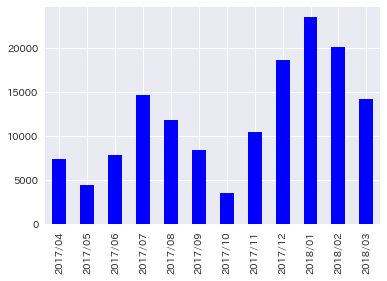

In [6]:
# 可視化（pandasを利用した場合）
vis_df_month['ガス量'].plot(kind='bar',colormap='bwr')

C:\Users\nishi\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


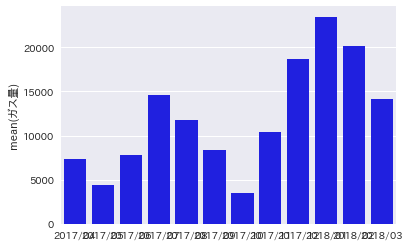

In [7]:
# 可視化（seabornを利用した場合）
sns.barplot(x=vis_df_month.index,y = vis_df_month['ガス量'],color='blue')

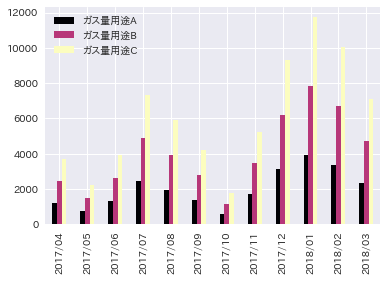

In [14]:
# 可視化（pandasを利用した場合）
'''
vis_df_month.columns.str.startswith('ガス量用途')の文言は、
ヘッダ行を検索して、先頭文字列にシングルクォートで囲まれた文字列が含まれているものを
選択する処理を行っている。
'''
vis_df_month.loc[:,vis_df_month.columns.str.startswith('ガス量用途')].plot(kind='bar',colormap='magma')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002514C664208>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x00000251515F9BE0>], dtype=object)

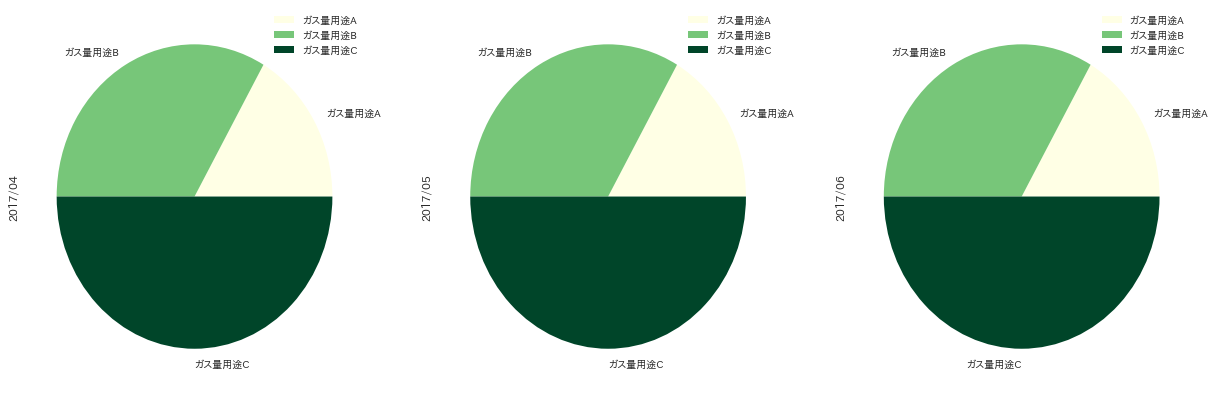

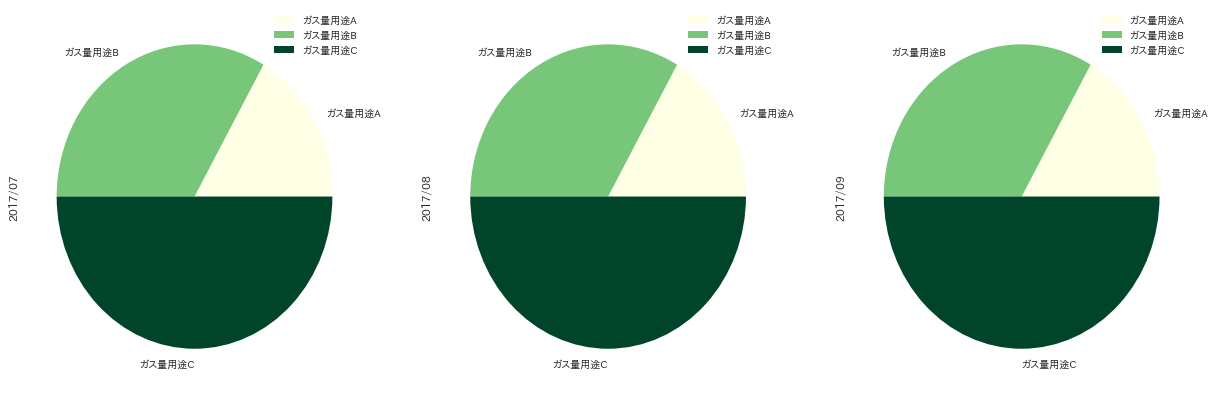

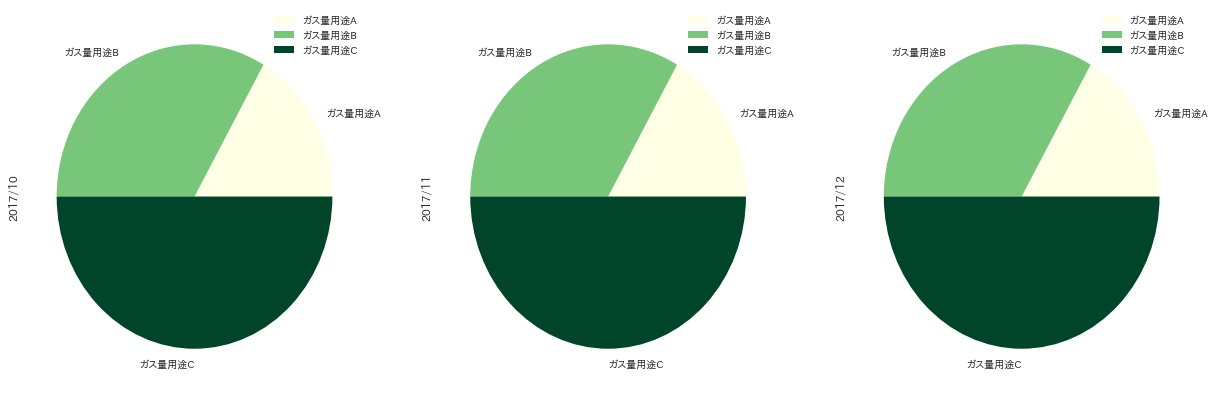

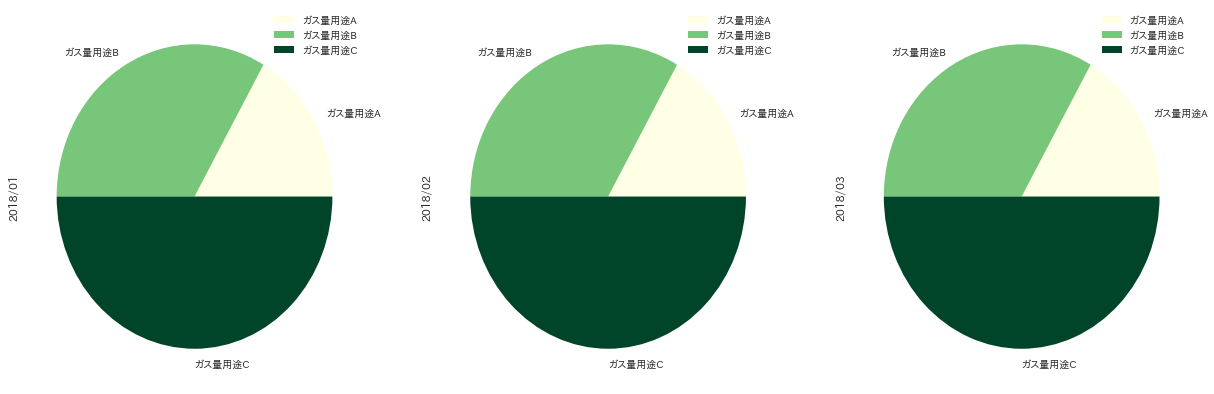

In [71]:
# 可視化（pandasを利用した場合）
'''
Pieチャートで月毎の利用用途の可視化
4行書いたのは見栄えのため。良い方法ある？
'''
vis_df_month.loc['2017/04':'2017/06',vis_df_month.columns.str.startswith('ガス量用途')].T.plot(kind='pie',figsize=(21,7),subplots=True,colormap='YlGn')
vis_df_month.loc['2017/07':'2017/09',vis_df_month.columns.str.startswith('ガス量用途')].T.plot(kind='pie',figsize=(21,7),subplots=True,colormap='YlGn')
vis_df_month.loc['2017/10':'2017/12',vis_df_month.columns.str.startswith('ガス量用途')].T.plot(kind='pie',figsize=(21,7),subplots=True,colormap='YlGn')
vis_df_month.loc['2018/01':'2018/03',vis_df_month.columns.str.startswith('ガス量用途')].T.plot(kind='pie',figsize=(21,7),subplots=True,colormap='YlGn')

## 電力量

## 月別可視化

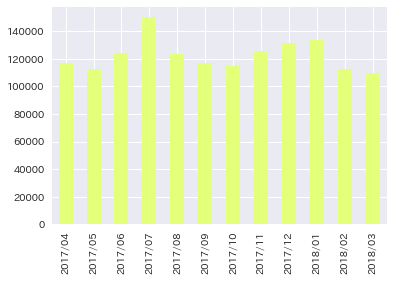

In [72]:
# 可視化（pandasを利用した場合）
vis_df_month['受電 電力量'].plot(kind='bar',colormap='Wistia')

C:\Users\nishi\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


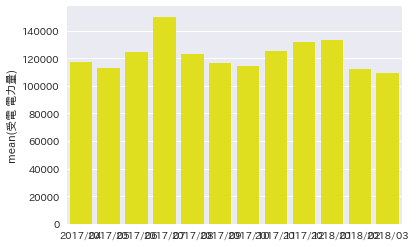

In [73]:
# 可視化（seabornを利用した場合）
sns.barplot(x=vis_df_month.index,y = vis_df_month['受電 電力量'],color='yellow')

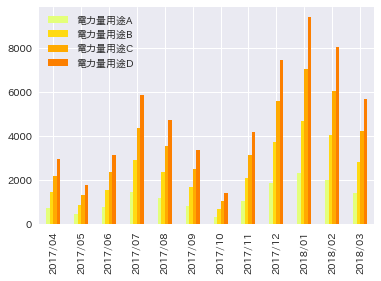

In [75]:
# 可視化（pandasを利用した場合）
'''
vis_df_month.columns.str.startswith('電力量用途')の文言は、
ヘッダ行を検索して、先頭文字列にシングルクォートで囲まれた文字列が含まれているものを
選択する処理を行っている。
'''
vis_df_month.loc[:,vis_df_month.columns.str.startswith('電力量用途')].plot(kind='bar',colormap='Wistia')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000251539F2518>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000002514FF04710>], dtype=object)

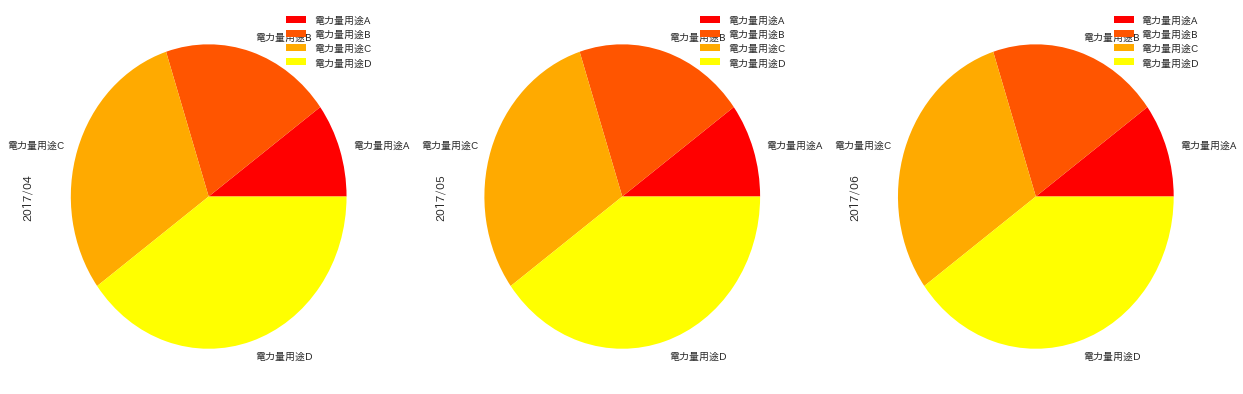

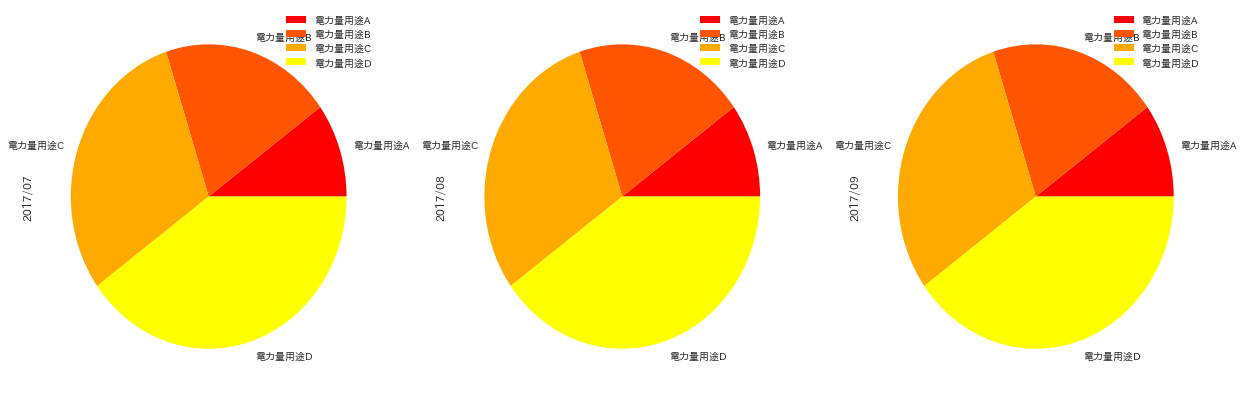

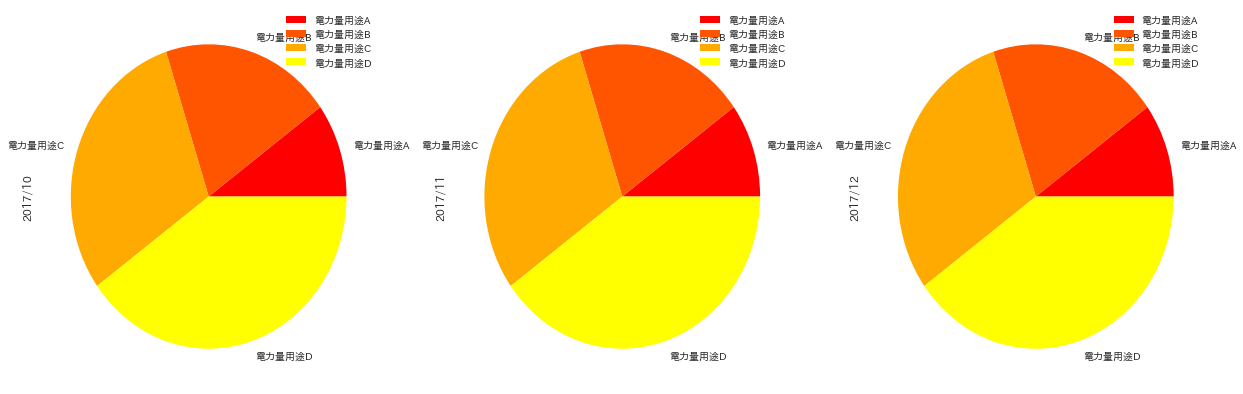

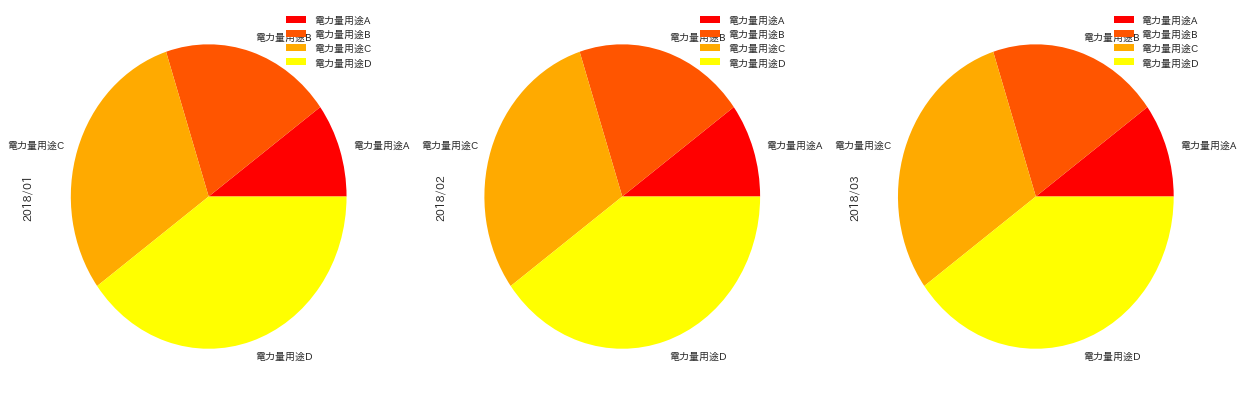

In [82]:
# 可視化（pandasを利用した場合）
'''
Pieチャートで月毎の利用用途の可視化
4行書いたのは見栄えのため。良い方法ある？
'''
vis_df_month.loc['2017/04':'2017/06',vis_df_month.columns.str.startswith('電力量用途')].T.plot(kind='pie',figsize=(21,7),subplots=True,colormap='autumn')
vis_df_month.loc['2017/07':'2017/09',vis_df_month.columns.str.startswith('電力量用途')].T.plot(kind='pie',figsize=(21,7),subplots=True,colormap='autumn')
vis_df_month.loc['2017/10':'2017/12',vis_df_month.columns.str.startswith('電力量用途')].T.plot(kind='pie',figsize=(21,7),subplots=True,colormap='autumn')
vis_df_month.loc['2018/01':'2018/03',vis_df_month.columns.str.startswith('電力量用途')].T.plot(kind='pie',figsize=(21,7),subplots=True,colormap='autumn')